# OBESITY PREDICTION


In [434]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data collection

In [435]:
#loading dataset
data=pd.read_csv('/content/Obesity.csv')

In [436]:
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [437]:
data.shape

(2111, 17)

In [438]:
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2101.000000  2111.000000  2111.000000  2111.000000   
mean     24.488346     1.701995    86.586058     2.419043     2.685628   
std       7.365358     0.093288    26.191172     0.533927     0.778039   
min       2.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.804818     1.701284    83.000000     2.385502     3.000000   
75%      26.000000     1.768834   107.430682     3.000000     3.000000   
max      99.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

These are the various features in data set
favc-Frequent consumption of high-caloric food,
FCVC (Frequency of consumption of vegetables),
NCP (Number of main meals per day),
CAEC (Consumption of food between meals),
CH2O (Daily water intake in liters),
CALC (Consumption of alcohol per day),
SCC (Monitoring of caloric intake),
FAF (Physical activity frequency per week),
TUE (Time spent on technology devices),
MTRANS (Mode of transportation),
NObeyesdad (Obesity levels)-Traget feature

In [440]:
#renaming nobeyesdad column name as obesity_level for better clarity
data.rename(columns={'NObeyesdad':'Obesity_level'},inplace=True)

In [441]:
#checking for missing values
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
Obesity_level                      0
dtype: int64

handling missing values

In [442]:
#handling missing value in gender
data['Gender'].value_counts()

Gender
Male      1061
Female    1041
Name: count, dtype: int64

In [443]:
data["Gender"].dtype

dtype('O')

In [444]:
#handling the data with mode since it is a categorical column
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

<ipython-input-445-6b9aa15af942>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

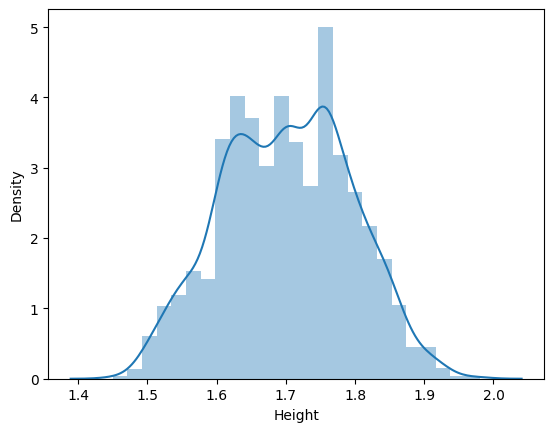

In [445]:
#handling null value in height column
#visualising distribution of height as histogram
sns.distplot(data['Height'])

In [446]:
#looks like skewed distribution thus filling the distribution with median
data['Height'].fillna(data['Height'].median(),inplace=True)

In [447]:
data['family_history_with_overweight'].isnull().sum()

6

In [448]:
data['family_history_with_overweight'].dtype

dtype('O')

In [449]:
data['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1722
no      383
Name: count, dtype: int64

In [450]:
#filling the data with mode
data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode()[0],inplace=True)

In [451]:
#handling null for caec column
data['CAEC'].value_counts()

CAEC
Sometimes     1758
Frequently     241
Always          53
no              50
Name: count, dtype: int64

In [452]:
data['CAEC'].dtype

dtype('O')

In [453]:
#filling with mode
data['CAEC'].fillna(data['CAEC'].mode()[0],inplace=True)

In [454]:
#handling null value for scc
data['SCC'].value_counts()

SCC
no     2008
yes      96
Name: count, dtype: int64

In [455]:
#replacing null with mode
data['SCC'].fillna(data['SCC'].mode()[0],inplace=True)


In [456]:
#handling null values of mtrans
data['MTRANS'].value_counts()

MTRANS
Public_Transportation    1576
Automobile                455
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [457]:
#filling data with mode
data['MTRANS'].fillna(data['MTRANS'].mode()[0],inplace=True)


In [458]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity_level                     0
dtype: int64

checking for outliers and handling if required

In [459]:
#grouping numerical features into a data frame
num_data=data.select_dtypes(include=['int64','float64'])

In [460]:
num_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [461]:
#grouping categorical features into dataframe
cat_data=data.select_dtypes(include=['object'])

In [462]:
cat_data.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'Obesity_level'],
      dtype='object')

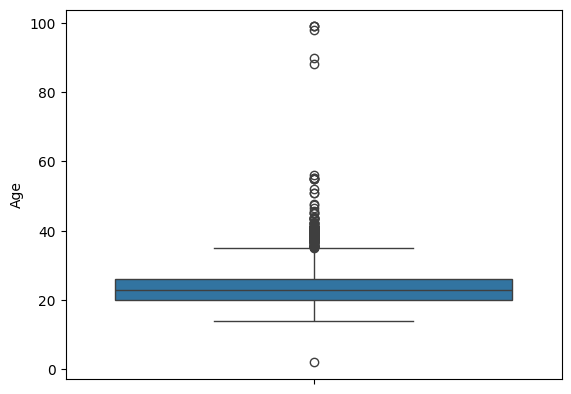

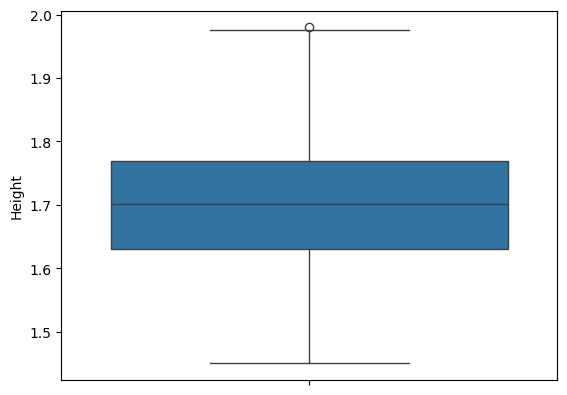

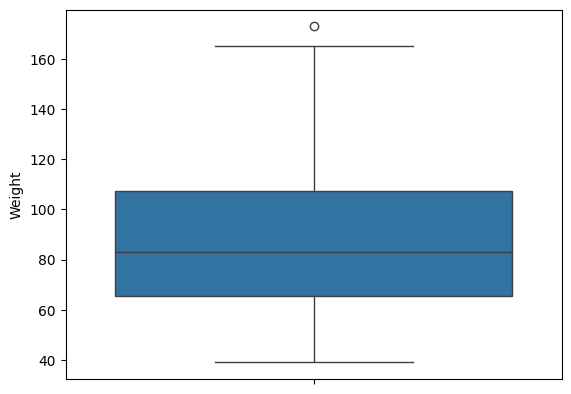

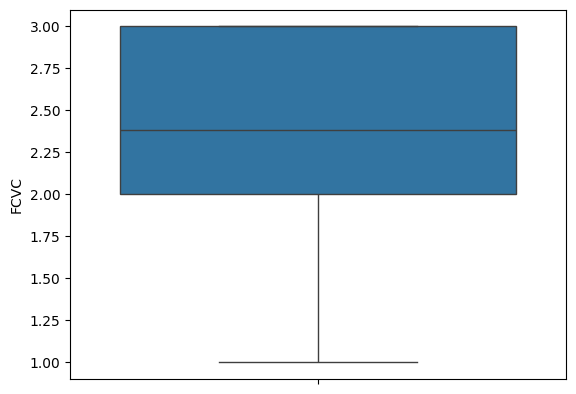

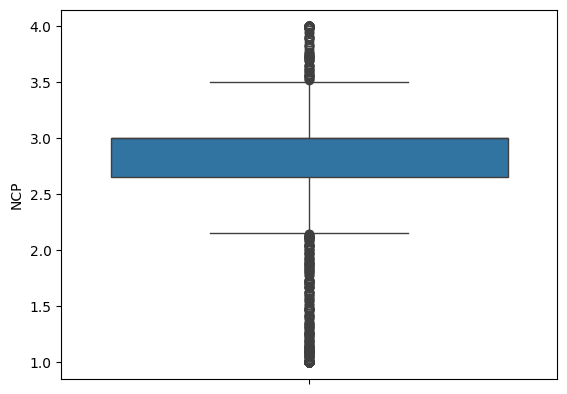

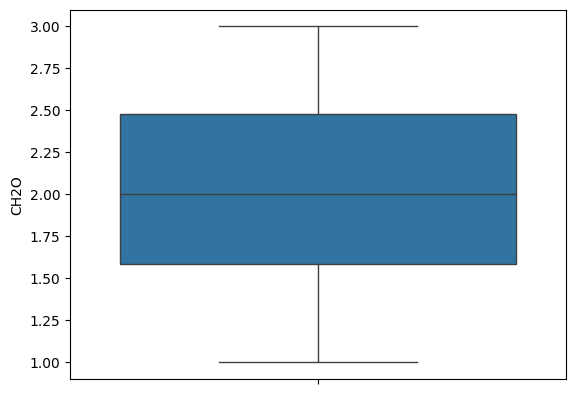

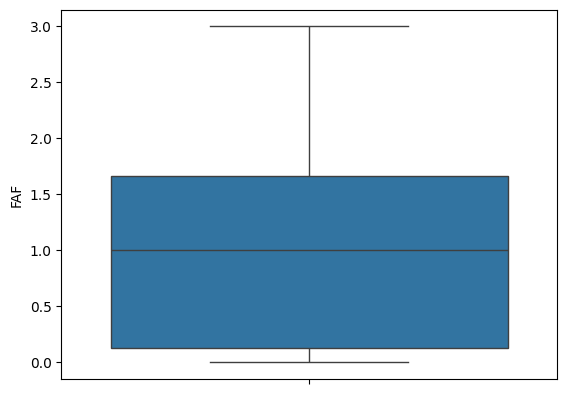

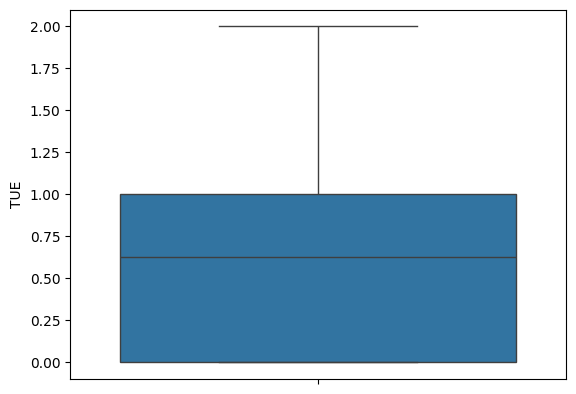

In [463]:
#checking for outliers in numerical features
for i in num_data.columns:
  sns.boxplot(data[i])
  plt.show()

age and ncp have outliers in box plot,need to check whether to handle it or not

<ipython-input-464-dce8c66408a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

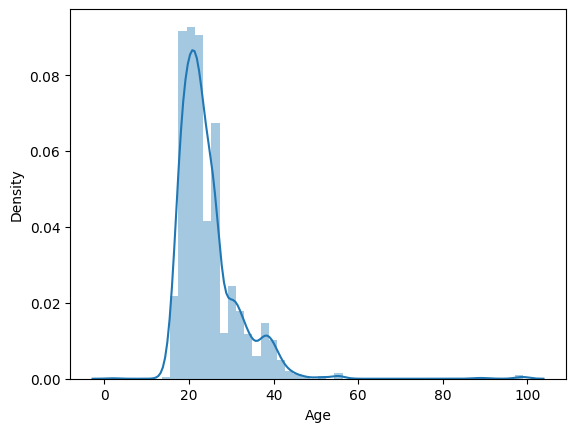

In [464]:
#visualising age column
sns.distplot(data['Age'])

In [465]:
#range of age
data['Age'].min(),data['Age'].max()

(2.0, 99.0)

since study is about all individuals handling outliers may result in loss of data.so decided to keep it as of now may handle it in future if required for model optimisation.

<ipython-input-466-0449f5abbe13>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NCP'])


<Axes: xlabel='NCP', ylabel='Density'>

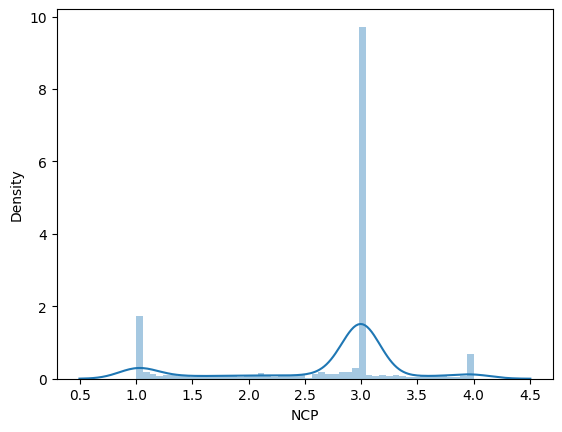

In [466]:
#checking distribution of ncp
sns.distplot(data['NCP'])

In [467]:
#range of ncp
data['NCP'].min(),data['NCP'].max()

(1.0, 4.0)

ncp,number of times meals taken. Though box plot indicates a large amout of data as outliers.The range of values is acceptable in practical context and capping values may falsify real data so retaining the values.

#EDA

Bivariate analysis

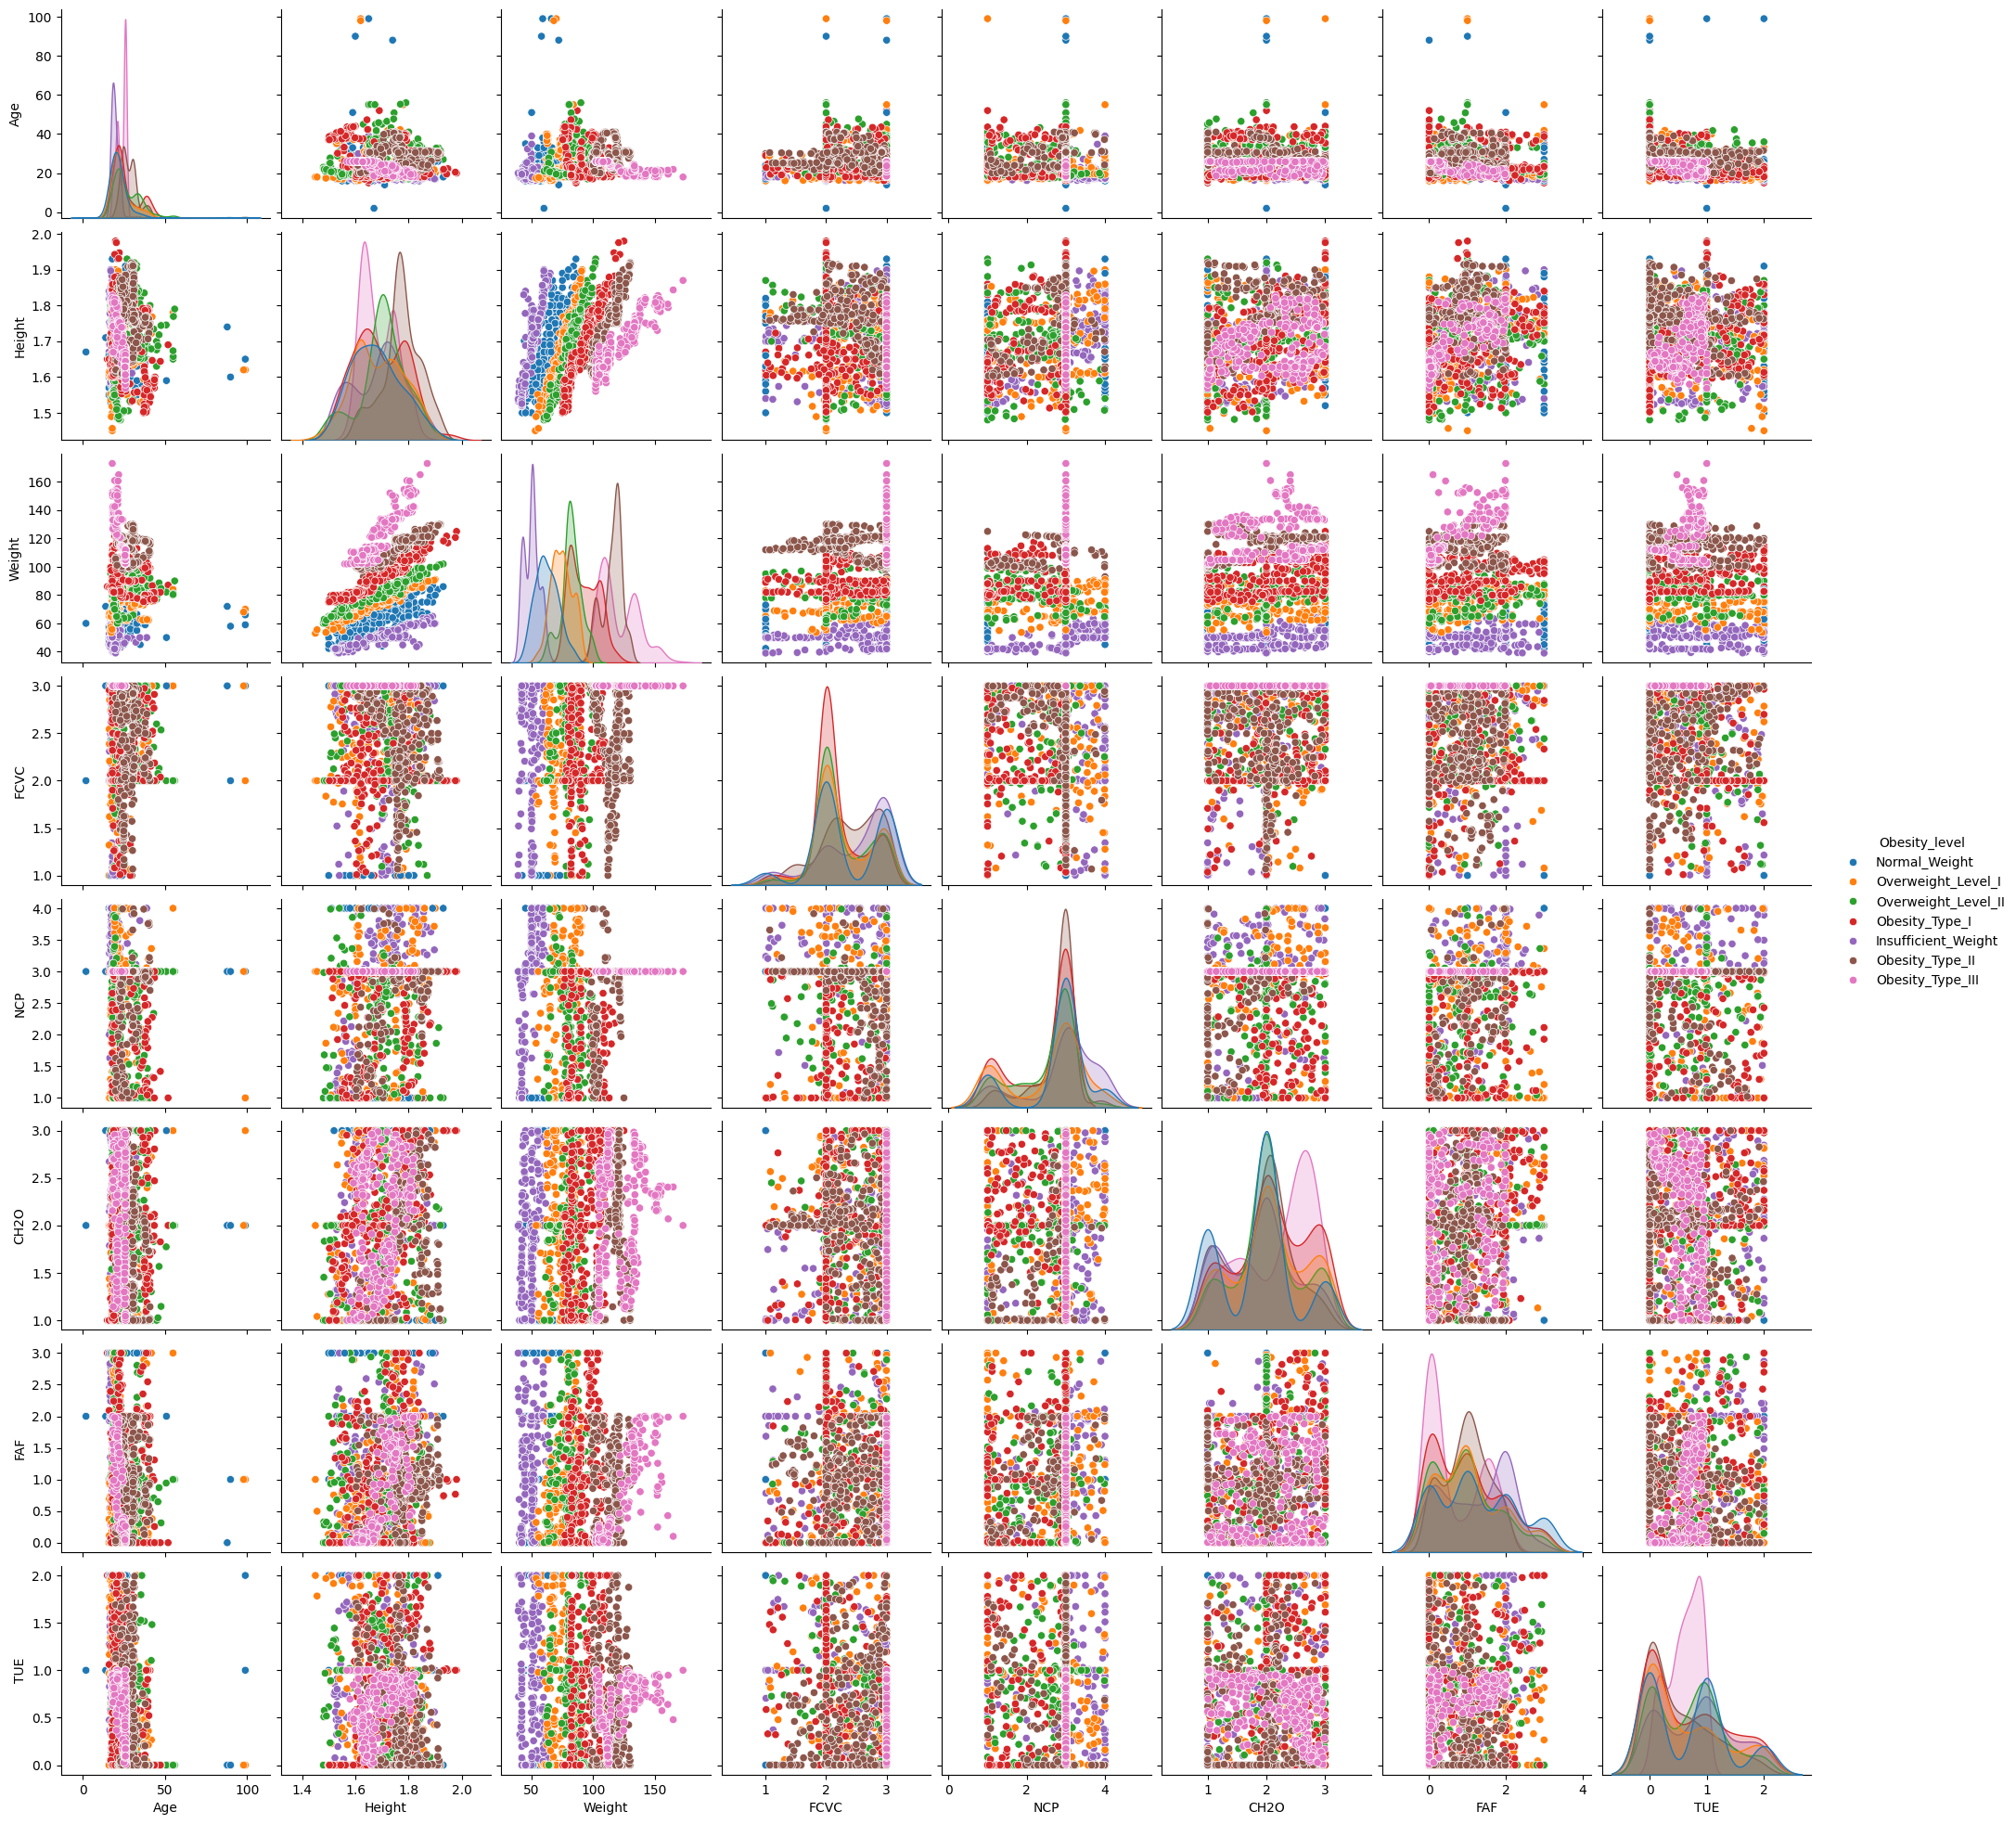

In [468]:

#visualising pairplot of features with obesity levels in different colors
sns.pairplot(data,hue='Obesity_level')

different obesity groups clusters are found in heigh and weight,similar clusters are found in fcvc,ncp,ch2o,faf and Tue against weight. Thus these features can be focused for classifying the obesity levels.

In [469]:
#checking correlation of numerical features
num_data.corr()


Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.039322  0.155285  0.024224 -0.053689 -0.031157 -0.131068   
Height -0.039322  1.000000  0.459878 -0.038148  0.244603  0.213295  0.296574   
Weight  0.155285  0.459878  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.024224 -0.038148  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.053689  0.244603  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.031157  0.213295  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.131068  0.296574 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.263556  0.051254 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.263556  
Height  0.051254  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

<Axes: >

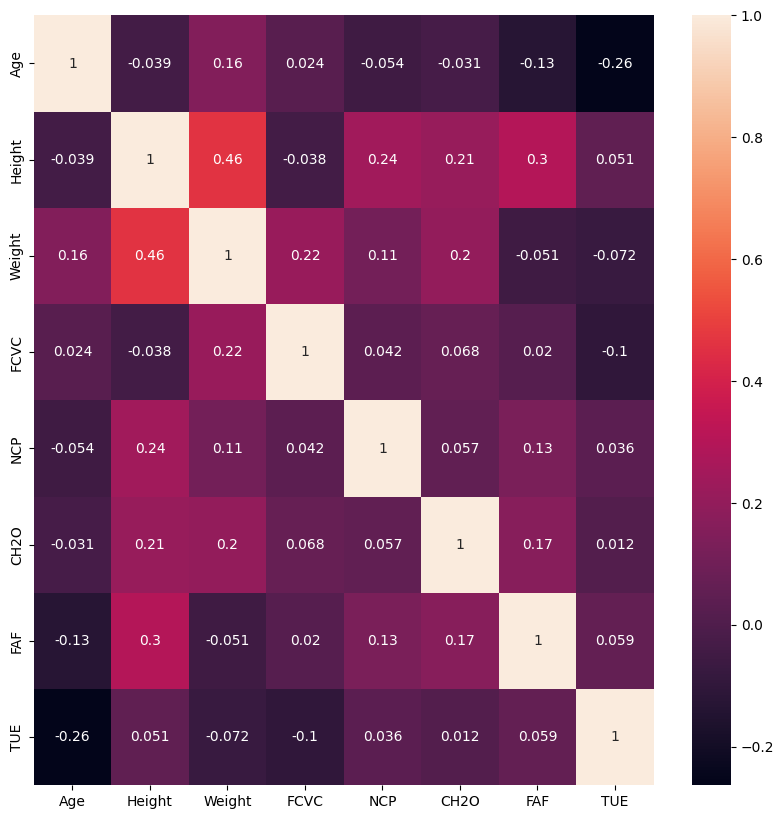

In [470]:
#corelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(),annot=True)

In [471]:
#check for duplication with correlation values
num_data.corr().duplicated()

Age       False
Height    False
Weight    False
FCVC      False
NCP       False
CH2O      False
FAF       False
TUE       False
dtype: bool

In [472]:
cat_data.columns


Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'Obesity_level'],
      dtype='object')

In [473]:
cat_data['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1728
no      383
Name: count, dtype: int64

In [474]:
cat_data['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [475]:
cat_data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [476]:
cat_data['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [477]:
cat_data['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [478]:
cat_data['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [479]:
cat_data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [480]:
cat_data['Obesity_level'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [481]:
cat_data['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [482]:

#encoding family_history_with_overweight
cat_data['family_history_with_overweight']=cat_data['family_history_with_overweight'].map({'yes':1,'no':0})


In [483]:
#encoding favc
cat_data['FAVC']=cat_data['FAVC'].map({'yes':1,'no':0})


In [484]:
#encoding smoke
cat_data['SMOKE']=cat_data['SMOKE'].map({'yes':1,'no':0})

#encoding scc
cat_data['SCC']=cat_data['SCC'].map({'yes':1,'no':0})

In [485]:
cat_data

Gender  family_history_with_overweight  FAVC       CAEC  SMOKE  SCC  \
0     Female                               1     0  Sometimes      0    0   
1     Female                               1     0  Sometimes      1    1   
2       Male                               1     0  Sometimes      0    0   
3       Male                               0     0  Sometimes      0    0   
4       Male                               0     0  Sometimes      0    0   
...      ...                             ...   ...        ...    ...  ...   
2106  Female                               1     1  Sometimes      0    0   
2107  Female                               1     1  Sometimes      0    0   
2108  Female                               1     1  Sometimes      0    0   
2109  Female                               1     1  Sometimes      0    0   
2110  Female                               1     1  Sometimes      0    0   

            CALC                 MTRANS        Obesity_level  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 9 columns]

In [486]:
#encoding gender
cat_data['Gender']=cat_data['Gender'].map({'Female':1,'Male':0})

In [487]:
#label encoding obesity_level
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_data['Obesity_level']=le.fit_transform(cat_data['Obesity_level'])

In [488]:
#obesity level classes
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [489]:
#encoding calc
cat_data['CALC']=cat_data['CALC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})




In [490]:
#encoding caec
cat_data['CAEC']=cat_data['CAEC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})

In [491]:
#one hot encoding mtran as
cat_data=pd.get_dummies(cat_data,columns=['MTRANS'])

In [492]:
cat_data

Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  \
0          1                               1     0     1      0    0     0   
1          1                               1     0     1      1    1     1   
2          0                               1     0     1      0    0     2   
3          0                               0     0     1      0    0     2   
4          0                               0     0     1      0    0     1   
...      ...                             ...   ...   ...    ...  ...   ...   
2106       1                               1     1     1      0    0     1   
2107       1                               1     1     1      0    0     1   
2108       1                               1     1     1      0    0     1   
2109       1                               1     1     1      0    0     1   
2110       1                               1     1     1      0    0     1   

      Obesity_level  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0                 1              False        False             False   
1                 1              False        False             False   
2                 1              False        False             False   
3                 5              False        False             False   
4                 6              False        False             False   
...             ...                ...          ...               ...   
2106              4              False        False             False   
2107              4              False        False             False   
2108              4              False        False             False   
2109              4              False        False             False   
2110              4              False        False             False   

      MTRANS_Public_Transportation  MTRANS_Walking  
0                             True           False  
1                             True           False  
2                             True           False  
3                            False            True  
4                             True           False  
...                            ...             ...  
2106                          True           False  
2107                          True           False  
2108                          True           False  
2109                          True           False  
2110                          True           False  

[2111 rows x 13 columns]

In [493]:
#convert boolean values to int
cat_data=cat_data.astype(int)


In [494]:
cat_data


Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  \
0          1                               1     0     1      0    0     0   
1          1                               1     0     1      1    1     1   
2          0                               1     0     1      0    0     2   
3          0                               0     0     1      0    0     2   
4          0                               0     0     1      0    0     1   
...      ...                             ...   ...   ...    ...  ...   ...   
2106       1                               1     1     1      0    0     1   
2107       1                               1     1     1      0    0     1   
2108       1                               1     1     1      0    0     1   
2109       1                               1     1     1      0    0     1   
2110       1                               1     1     1      0    0     1   

      Obesity_level  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0                 1                  0            0                 0   
1                 1                  0            0                 0   
2                 1                  0            0                 0   
3                 5                  0            0                 0   
4                 6                  0            0                 0   
...             ...                ...          ...               ...   
2106              4                  0            0                 0   
2107              4                  0            0                 0   
2108              4                  0            0                 0   
2109              4                  0            0                 0   
2110              4                  0            0                 0   

      MTRANS_Public_Transportation  MTRANS_Walking  
0                                1               0  
1                                1               0  
2                                1               0  
3                                0               1  
4                                1               0  
...                            ...             ...  
2106                             1               0  
2107                             1               0  
2108                             1               0  
2109                             1               0  
2110                             1               0  

[2111 rows x 13 columns]

In [495]:
x=cat_data.drop('Obesity_level',axis=1)
y=cat_data['Obesity_level']

In [496]:
chi2_scores, p_values = chi2(x,y)

# Creating a DataFrame to show the scores
chi2_results = pd.DataFrame({
    'Feature': x.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)



In [497]:
chi2_results

Feature  Chi2 Score       p-value
0                           Gender  333.454239  5.489390e-69
7                MTRANS_Automobile  122.972323  3.868551e-24
5                              SCC  117.429254  5.646959e-23
1   family_history_with_overweight  111.962519  7.910716e-22
11                  MTRANS_Walking   94.650567  3.268853e-18
3                             CAEC   76.273289  2.098391e-14
6                             CALC   67.677522  1.223111e-12
10    MTRANS_Public_Transportation   37.313184  1.529868e-06
4                            SMOKE   31.467977  2.063159e-05
2                             FAVC   27.081298  1.398163e-04
9                 MTRANS_Motorbike   19.316477  3.661234e-03
8                      MTRANS_Bike   14.987342  2.035539e-02

In [498]:
#dropping favc,smoke,caec,calc
cat_data=cat_data.drop(['FAVC','SMOKE','CAEC','CALC'],axis=1)



In [499]:
num_data

Age    Height      Weight  FCVC  NCP      CH2O       FAF       TUE
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000  1.000000
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000  0.000000
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000  1.000000
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000  0.000000
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000  0.000000
...         ...       ...         ...   ...  ...       ...       ...       ...
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269  0.906247
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390  0.599270
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209  0.646288
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107  0.586035
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452  0.714137

[2111 rows x 8 columns]

In [500]:

#combining num and cat
df=pd.concat([num_data,cat_data],axis=1)

In [501]:
x=df.drop('Obesity_level',axis=1)
y=df['Obesity_level']

In [502]:
#scaling x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [503]:
#spliting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [504]:
#modelling using logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [505]:
#testing accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8888888888888888
[[55  1  0  0  0  0  0]
 [ 9 46  0  0  0  7  0]
 [ 0  0 71  6  0  0  1]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 42 11]
 [ 0  0  4  0  0  5 41]]


In [506]:
#modelling using naive model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [507]:
#accuracy and confusion matrix
y_pred=nb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.5366430260047281
[[55  0  0  0  1  0  0]
 [50  1  3  0  4  3  1]
 [ 1  1 50 24  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [25  0 24  0  0  1  6]
 [ 6  1 38  4  0  0  1]]


In [508]:
#modelling using svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [509]:
#accuracy and confusion matrix
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8534278959810875
[[52  4  0  0  0  0  0]
 [ 9 45  0  0  0  6  2]
 [ 0  1 69  5  0  1  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0 11  0  0  0 37  8]
 [ 0  1  5  0  0  6 38]]


In [510]:
#modelling using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [511]:
#accuracy and confusion matrix
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9432624113475178
[[53  3  0  0  0  0  0]
 [ 7 53  0  0  0  2  0]
 [ 0  0 75  2  0  0  1]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 53  1]
 [ 0  0  1  0  0  2 47]]


In [512]:
#precision
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,y_pred,average='weighted'))

0.9436566037461462


In [513]:
#modelling using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [514]:
#accuracy and confusion matrix
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.9456264775413712
[[54  2  0  0  0  0  0]
 [ 0 57  0  0  0  4  1]
 [ 0  1 75  2  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 47  2]
 [ 0  0  1  1  0  1 47]]


In [515]:
#precision
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,y_pred,average='weighted'))


0.9466564521185037


random forest is found as best model with a accuracy of 0.95

In [517]:
from sklearn.model_selection import RandomizedSearchCV

In [524]:
# Define the hyperparameter grid
param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # None means no limit
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split

}


In [526]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Try 100 different combinations
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Can also use other metrics like 'precision', 'recall', etc.
    n_jobs=-1,  # Use all available cores
    random_state=42
)


In [527]:
# Fit RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   random_state=42, scoring='accuracy')

In [529]:
# Best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")


Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy'}
Test Set Accuracy: 0.96


## tuned model of random forest shows an accuracy of 0.96